
# Física Nuclear y de Partículas #

## Tema 1. Principales características del núcleo atómico.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- 1. Densidad nuclear de Woods-Saxon
- 2. Potencial de Woods-Saxon
- 3. Fórmula semiempírica de masas (FSM)
- 4. Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$
- 5. Energía de ligadura por nucleón en función de $A$ para el núcleo más dado un $A$
- 6. Comparación de la FSM con el experimento 
- 7. Algunos números adicionales


### Notas ###

Los apartados 3, 4, 5, 6 y 7 están basados en el trabajo de Christian Hill y reutiliza códigos desarrollados por él.
Ver https://scipython.com/blog/nuclear-binding-energies-1/ 


Se hace uso de las energías de ligaduras de los núcleos recopilados en el Atomic Mass Evaluation (AME2020) [Chin. Phys.C45 (2021) 030002; íbid. 030003] y en la base de datos nuDat 3.0 https://www.nndc.bnl.gov/nudat3/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 40*'-'

### Potencial de Woods-Saxon y densidad nuclear ###

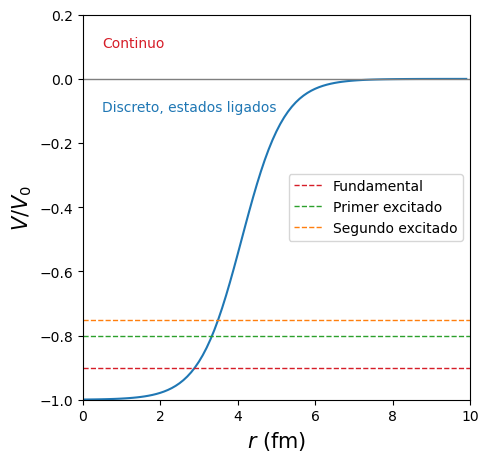

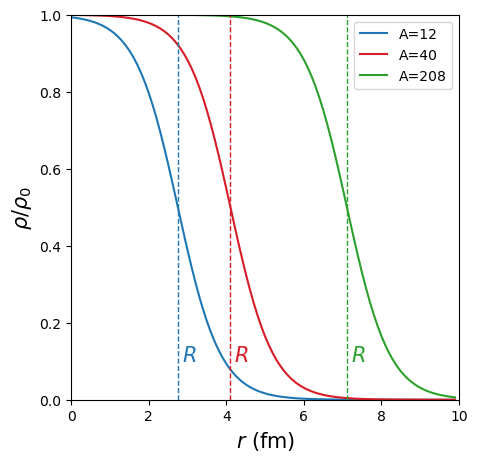

In [2]:
# A: Número de nucleones
# r0: constante, ha de ser 1.22
# a: espesor de la corteza

def radio(r0,A):
    return  r0*(A**(1/3))

def densidadnuclear(r0,A,a,r):
    R = radio(r0,A)
    return 1./(1.+np.exp((r-R)/a))

def WoodsSaxon(r0,A,a,r):
    R = radio(r0,A)
    return -1./(1.+np.exp((r-R)/a))

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$V/V_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((-1.,0.2))
plt.plot(r,WoodsSaxon(1.2,40,0.55,r),'-',c=jpac_color[0])
plt.hlines(-0.90,0.,10.,colors=jpac_color[1], lw=1., linestyles='dashed',label='Fundamental')
plt.hlines(-0.80,0.,10.,colors=jpac_color[2], lw=1., linestyles='dashed',label='Primer excitado')
plt.hlines(-0.75,0.,10.,colors=jpac_color[3], lw=1., linestyles='dashed',label='Segundo excitado')
plt.hlines(0.,0.,10.,colors=jpac_color[9], lw=1., linestyles='solid')
plt.text(0.5,-0.1,r'Discreto, estados ligados',c=jpac_color[0],fontsize=10)
plt.text(0.5,0.1,r'Continuo',c=jpac_color[1],fontsize=10)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()    

fig = plt.figure(figsize=(5,5))
r = np.arange(0.,10.,0.1)
plt.ylabel(r'$\rho/\rho_0$',fontsize=15)
plt.xlabel(r'$r$ (fm)',fontsize=15)
plt.xlim((0.,10.))
plt.ylim((0.,1.))
plt.plot(r,densidadnuclear(1.2,12,0.55,r),'-',c=jpac_color[0],label='A=12')
plt.plot(r,densidadnuclear(1.2,40,0.55,r),'-',c=jpac_color[1],label='A=40')
plt.plot(r,densidadnuclear(1.2,208,0.55,r),'-',c=jpac_color[2],label='A=208')
plt.vlines(radio(1.2,12),0.,1.,colors=jpac_color[0], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,40),0.,1.,colors=jpac_color[1], lw=1., linestyles='dashed')
plt.vlines(radio(1.2,208),0.,1.,colors=jpac_color[2], lw=1., linestyles='dashed')
plt.text(radio(1.2,12)+0.1,0.1,r'$R$',c=jpac_color[0],fontsize=15)
plt.text(radio(1.2,40)+0.1,0.1,r'$R$',c=jpac_color[1],fontsize=15)
plt.text(radio(1.2,208)+0.1,0.1,r'$R$',c=jpac_color[2],fontsize=15)
plt.legend(loc='upper right',ncol=1,frameon=True)
plt.show()    

### Representación de la energía de ligadura por nucleón de los núcleos en función de $Z$ y $N$ ###

Número de núcleos NuDat: 3556


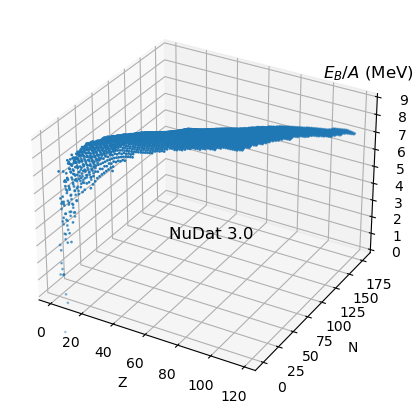

Número de núcleos AME: 2511


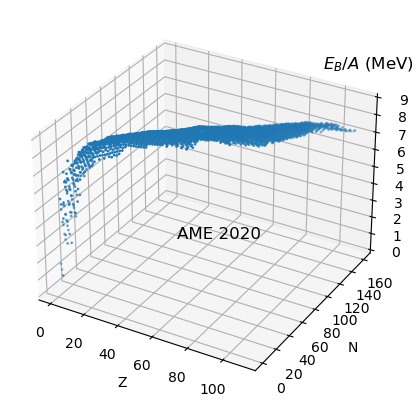

In [3]:
file0 = 'nndc_nudat_data_stable.csv'
df0 = pd.read_csv(file0,sep=',',header=1)
df0.columns = ('Z', 'N', 'halflife')
df00 = df0.loc[(df0['halflife']=='STABLE' )]

file1 = 'nndc_nudat_data_export.csv'
dfa = pd.read_csv(file1,sep=',',header=1)
dfa.columns = ('Z', 'N', 'avEbind')
dfa['A'] = dfa['Z'] + dfa['N'] 
dfa['avEbind'] = pd.to_numeric(dfa['avEbind'], errors='coerce')
dfa = dfa.dropna()
dfa['avEbind'] /= 1000
print('Número de núcleos NuDat:',dfa['N'].count())

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
ax.set_zlim((0.,9.))
ax.set_xlabel('Z')
ax.set_ylabel('N')
ax.set_zlabel(r'$E_B/A$ (MeV)')
ax.text(110,140,11.,r'$E_B/A$ (MeV)',c=jpac_color[10],fontsize=12)
ax.text(50,50,3.,'NuDat 3.0',c=jpac_color[10],fontsize=12)
ax.scatter(dfa['Z'],dfa['N'],dfa['avEbind'],marker='o',s=1,c=jpac_color[0])
plt.show()
fig.savefig('BindingEnergy3DNuDat.pdf', bbox_inches='tight')   

file = 'mass_1.mas20.txt'

df = pd.read_fwf(file, usecols=(2,3,4,11),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              skiprows=39, header=None,
              index_col=False)
df.columns = ('N', 'Z', 'A', 'avEbind')
df['avEbind'] = pd.to_numeric(df['avEbind'], errors='coerce')
df = df.dropna()
# Also convert from keV to MeV.
df['avEbind'] /= 1000
print('Número de núcleos AME:',df['N'].count())

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
ax.set_zlim((0.,9.))
ax.set_xlabel('Z')
ax.set_ylabel('N')
ax.set_zlabel(r'$E_B/A$ (MeV)')
ax.text(50,50,3.,'AME 2020',c=jpac_color[10],fontsize=12)
ax.text(98,140,11.,r'$E_B/A$ (MeV)',c=jpac_color[10],fontsize=12)
ax.scatter(df['Z'],df['N'],df['avEbind'],marker='o',s=1,c=jpac_color[0])
plt.show()
fig.savefig('BindingEnergy3DAME.pdf', bbox_inches='tight')   

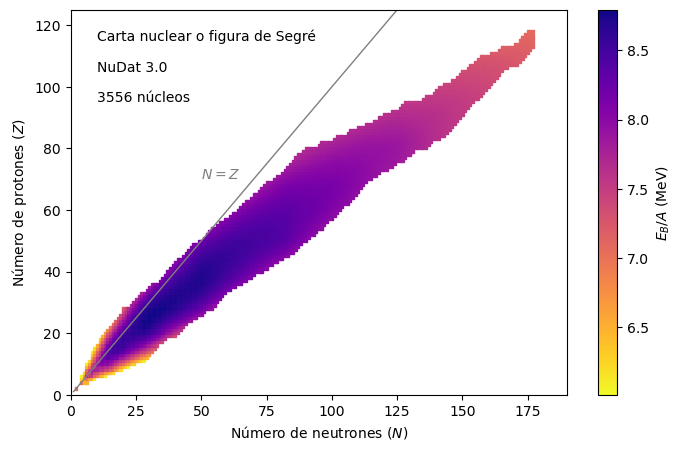

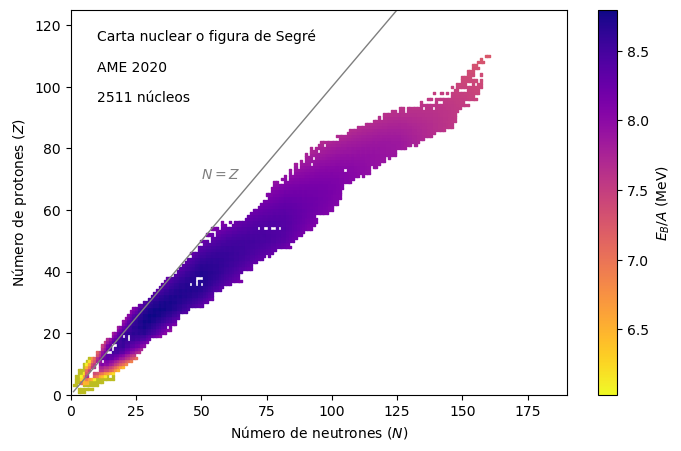

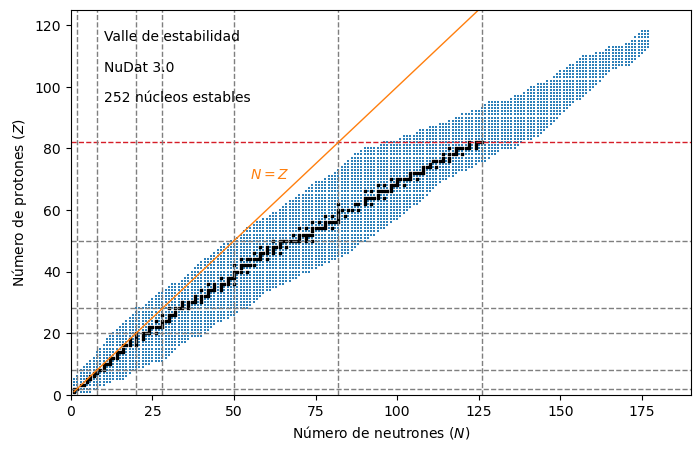

Par-Par  147
Par-Impar  54
Impar-Par  47
Impar-Impar  4
252


In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
dfa1 = dfa.loc[(dfa['avEbind'] >= 6)]
dfa2 = dfa.loc[(dfa['avEbind'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
ax.text(10,115,r'Carta nuclear o figura de Segré',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'NuDat 3.0',c=jpac_color[10],fontsize=10)
texto = str(dfa['N'].count()) + ' núcleos'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(50,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
pa = ax.scatter(dfa1['N'],dfa1['Z'],marker='s',s=2.5, c=dfa1['avEbind'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A$ (MeV)')
plt.show() 
fig.savefig('CartaNuclearNuDat.pdf', bbox_inches='tight')   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
df1 = df.loc[(df['avEbind'] >= 6)]
df2 = df.loc[(df['avEbind'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
ax.text(10,115,r'Carta nuclear o figura de Segré',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'AME 2020',c=jpac_color[10],fontsize=10)
texto = str(df['N'].count()) + ' núcleos'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(50,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
ax.scatter(df2['N'],df2['Z'],marker='s',s=2.5, c=jpac_color[7])
p = ax.scatter(df1['N'],df1['Z'],marker='s',s=2.5, c=df1['avEbind'], cmap='plasma_r')
fig.colorbar(p,ax=ax,orientation='vertical',label=r'$E_B/A$ (MeV)')
plt.show() 
fig.savefig('CartaNuclearAME.pdf', bbox_inches='tight')   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
dfa1 = dfa.loc[(dfa['avEbind'] >= 6)]
dfa2 = dfa.loc[(dfa['avEbind'] < 6)]
ax.set_xlim((0,190))
ax.set_ylim((0,125))
plt.hlines( 2 ,0.,190.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 8 ,0.,190.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 20 ,0.,190.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 28 ,0.,190.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 50 ,0.,190.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines( 82 ,0.,190.,colors=jpac_color[1], lw=1., linestyles='dashed')
plt.hlines( 126 ,0.,190.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( 2 , 0, 125    ,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( 8 , 0, 125    ,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( 20 , 0, 125    ,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(  28, 0, 125    ,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( 50 , 0, 125    ,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( 82 , 0, 125    ,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines( 126 , 0, 125    ,colors=jpac_color[9], lw=1., linestyles='dashed')
ax.plot(x,x,'-',lw=1,color=jpac_color[3])
ax.text(10,115,r'Valle de estabilidad',c=jpac_color[10],fontsize=10)
ax.text(10,105,r'NuDat 3.0',c=jpac_color[10],fontsize=10)
texto = str(df00['N'].count()) + ' núcleos estables'
ax.text(10,95,texto,c=jpac_color[10],fontsize=10)
ax.text(55,70,r'$N=Z$',c=jpac_color[3],fontsize=10)
ax.scatter(dfa['N'],dfa['Z'],marker='s',s=2, c=jpac_color[0],edgecolors='white',lw=0.05)
ax.scatter(df00['N'],df00['Z'],marker='s',s=2, c=jpac_color[10])

plt.show() 
fig.savefig('ValleEstabilidadNuDat.pdf', bbox_inches='tight')   


dfa2 = dfa.loc[(dfa['avEbind'] < 6)]

dfparpar = df00.loc[ ((df00['Z']%2==0) & (df00['N']%2==0))]
dfimparimpar = df00.loc[ ((df00['Z']%2!=0) & (df00['N']%2!=0))]
dfparimpar = df00.loc[ ((df00['Z']%2==0) & (df00['N']%2!=0))]
dfimparpar = df00.loc[ ((df00['Z']%2!=0) & (df00['N']%2==0))]


print('Par-Par ',dfparpar['Z'].count())
print('Par-Impar ',dfparimpar['Z'].count())
print('Impar-Par ',dfimparpar['Z'].count())
print('Impar-Impar ',dfimparimpar['Z'].count())

print( dfparpar['Z'].count()+ dfimparimpar['Z'].count() +dfparimpar['Z'].count()+dfimparpar['Z'].count()  )

### Energía de ligadura por nucleón en función de $A$ para el núcleo más dado un $A$. Fórmula Semiempírica de masas ###


$$ E_B / A = a_V - a_S / A^{1/3} - a_C * Z^2 / A^{4/3} - a_A * (A-2\, Z)^2/A^2 + \delta /A^{3/2}$$

donde 

$$    a_V, a_S, a_C, a_A = 15.75, 17.8, 0.711, 23.7 $$

y $\delta$

$$\begin{matrix} par-par \quad 11,18 \\ par-impar \quad 0 \\ impar-impar \quad -11,18 \end{matrix}$$


Parametrización de J. W. Rohlf, Modern Physics from α to Z0, Wiley (1994).

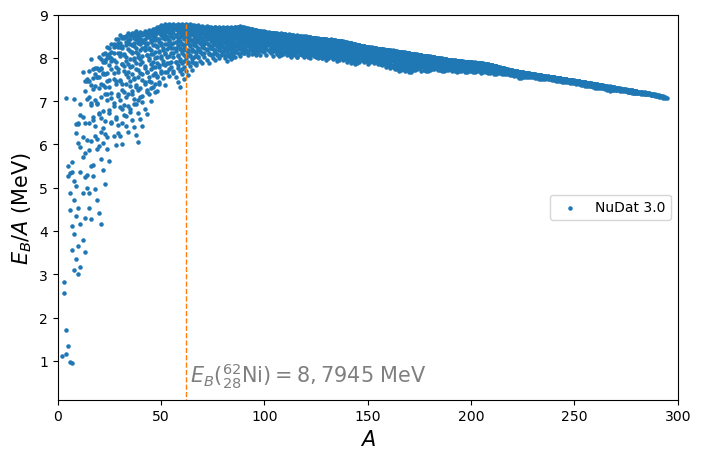

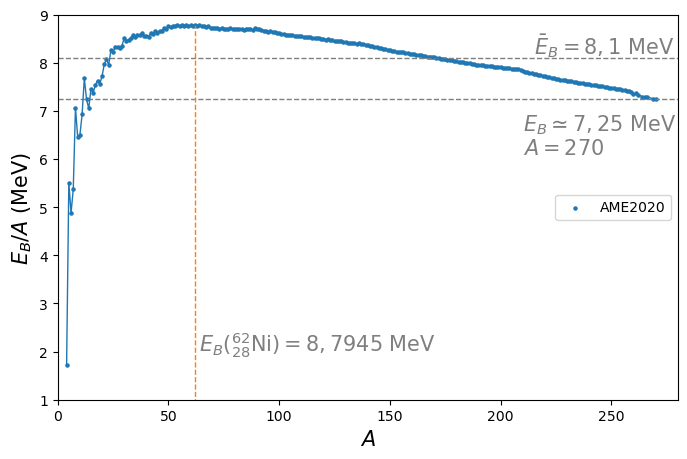

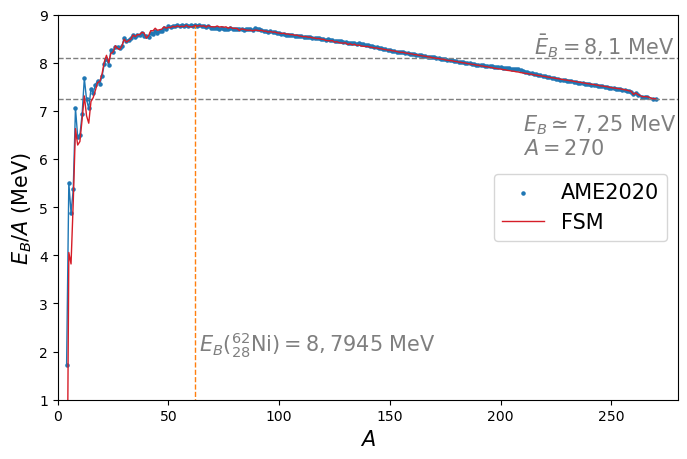

In [5]:
def SEMF(Z,N):
    aV, aS, aC, aA, delta = 15.75, 17.8, 0.711, 23.7, 11.18
    Z, N = np.atleast_1d(Z), np.atleast_1d(N)
    A = Z + N
    sgn = np.zeros(Z.shape)
    sgn[(Z%2==0) & (N%2==0)] =  1.
    sgn[(Z%2!=0) & (N%2!=0)] = -1.
    return aV - aS / A**(1./3.) - aC * Z**2. / A**(4./3.) - aA * (A-2.*Z)**2./A**2. + sgn * delta/A**(3./2.)

gdfa = df.groupby('A')
maxavEbinda = gdfa.apply(lambda t: t[t.avEbind==t.avEbind.max()])
maxavEbinda['Eapprox'] = SEMF(maxavEbinda['Z'], maxavEbinda['N'])

gdf = df.groupby('A')
maxavEbind = gdf.apply(lambda t: t[t.avEbind==t.avEbind.max()])
maxavEbind['Eapprox'] = SEMF(maxavEbind['Z'], maxavEbind['N'])


fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((0.1,9.))
plt.xlim((0.,300.))
plt.vlines(62,0.,dfa['avEbind'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(dfa['A'], dfa['avEbind'],marker='o',s=5,c=jpac_color[0],label='NuDat 3.0')
#plt.plot(dfa['A'], dfa['avEbind'],'-',lw=1,c=jpac_color[0])
plt.text(64,0.5,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  
fig.savefig('BENuDat.pdf', bbox_inches='tight')   

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((1.,9.))
plt.xlim((0.,280.))
plt.hlines(8.09670568181818,0.,280.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines(7.25,0.,280.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(62,0.,maxavEbind['avEbind'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(maxavEbind['A'], maxavEbind['avEbind'],marker='o',s=5,c=jpac_color[0],label='AME2020')
plt.plot(maxavEbind['A'], maxavEbind['avEbind'],'-',lw=1,c=jpac_color[0])
plt.text(215,8.2,r'$\bar{E}_B=8,1$ MeV',c=jpac_color[9],fontsize=15)
plt.text(64,2,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.text(210,6.6,r'$E_B\simeq 7,25$ MeV',c=jpac_color[9],fontsize=15)
plt.text(210,6.1,r'$A=270$',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((1.,9.))
plt.xlim((0.,280.))
plt.hlines(8.09670568181818,0.,280.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.hlines(7.25,0.,280.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(62,0.,maxavEbind['avEbind'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(maxavEbind['A'], maxavEbind['avEbind'],marker='o',s=5,c=jpac_color[0],label='AME2020')
plt.plot(maxavEbind['A'], maxavEbind['avEbind'],'-',lw=1,c=jpac_color[0])
plt.plot(maxavEbind['A'], maxavEbind['Eapprox'],'-',lw=1,c=jpac_color[1],label='FSM')
plt.text(215,8.2,r'$\bar{E}_B=8,1$ MeV',c=jpac_color[9],fontsize=15)
plt.text(64,2,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.text(210,6.6,r'$E_B\simeq 7,25$ MeV',c=jpac_color[9],fontsize=15)
plt.text(210,6.1,r'$A=270$',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True,prop={'size': 15})
plt.show() 
fig.savefig('FSM.pdf', bbox_inches='tight')   

### Diferencia entre la FSM y los datos experimentales ###

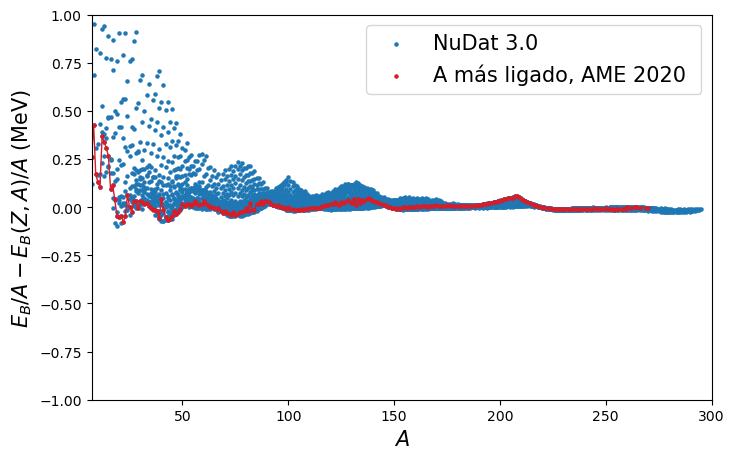

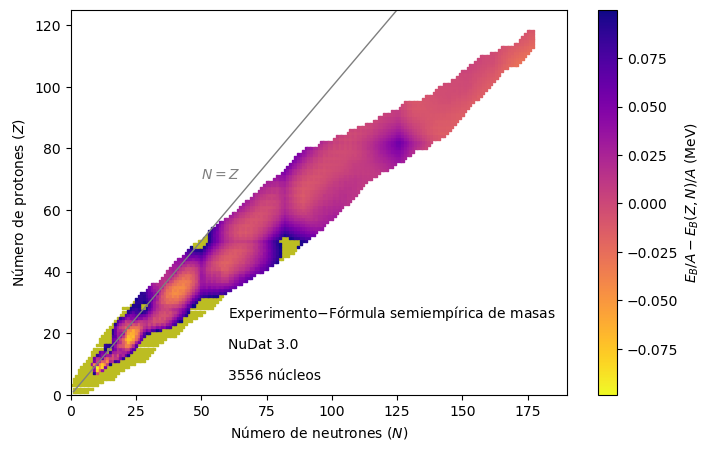

In [6]:
fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A-E_B(Z,A)/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((-1.,1.))
plt.xlim((7.,300.))
plt.scatter(dfa['A'], dfa['avEbind']-SEMF(dfa['Z'],dfa['N']),marker='o',s=5,c=jpac_color[0],label='NuDat 3.0')
plt.scatter(maxavEbind['A'], maxavEbind['avEbind']-maxavEbind['Eapprox'],marker='o',s=5,c=jpac_color[1],label='A más ligado, AME 2020 ')
plt.plot(maxavEbind['A'], maxavEbind['avEbind']-maxavEbind['Eapprox'],'-',lw=1,c=jpac_color[1])
plt.legend(loc='upper right',ncol=1,frameon=True,prop={'size': 15})
plt.show()
fig.savefig('diffFSM.pdf', bbox_inches='tight') 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')

dfa['diff'] = dfa['avEbind'] - SEMF(dfa['Z'],dfa['N'])

dfa1 = dfa.loc[(dfa['diff'] < 0.1)]
dfa2 = dfa.loc[(dfa['diff'] >= .1)]

ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
ax.text(60,25,r'Experimento$-$Fórmula semiempírica de masas',c=jpac_color[10],fontsize=10)
ax.text(60,15,r'NuDat 3.0',c=jpac_color[10],fontsize=10)
texto = str(dfa['N'].count()) + ' núcleos'
ax.text(60,5,texto,c=jpac_color[10],fontsize=10)
ax.text(50,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
ax.scatter(dfa2['N'],dfa2['Z'],marker='s',s=2.5, c=jpac_color[7])
pa = ax.scatter(dfa1['N'],dfa1['Z'],marker='s',s=2.5, c=dfa1['diff'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A-E_B(Z,N)/A$ (MeV)')
plt.show() 
fig.savefig('CartaNuclearEBNuDat.pdf', bbox_inches='tight')   

### Algunos números adicionales ###

In [7]:
print(' '); print(dashes); print('AME 2020'); print(dashes); 
print('Energía de ligadura por nucleón promedio de todos los núcleos medidos:',df['avEbind'].mean(),' MeV')
print('Desviación estándar:',df['avEbind'].std(),' MeV')
print(dashes);
print('Núcleo con la energía de ligadura por nucleón más alta')
print(maxavEbind[ maxavEbind['avEbind'] == maxavEbind['avEbind'].max()])
print('Energía por nucleón promedio:',maxavEbind['avEbind'].mean(),' MeV')
print(' '); print(dashes); print('NuDat 3.0'); print(dashes);
print('Energía de ligadura por nucleón promedio de todos los núcleos medidos:',dfa['avEbind'].mean(),' MeV')
print('Desviación estándar:',dfa['avEbind'].std(),' MeV')
print(dashes);
print('Núcleo con la energía de ligadura por nucleón más alta')
print(dfa[ dfa['avEbind'] == dfa['avEbind'].max()])
print('Energía por nucleón promedio:',dfa['avEbind'].mean(),' MeV')
print(' '); print(dashes);
print('Núcleo con la energía de ligadura por nucleón más alta según la FSM')
print(maxavEbind[ maxavEbind['Eapprox'] == maxavEbind['Eapprox'].max()])


 
----------------------------------------
AME 2020
----------------------------------------
Energía de ligadura por nucleón promedio de todos los núcleos medidos: 8.057343130227002  MeV
Desviación estándar: 0.6692732452476944  MeV
----------------------------------------
Núcleo con la energía de ligadura por nucleón más alta
         N   Z   A  avEbind  Eapprox
A                                   
62 589  34  28  62   8.7945  8.78201
Energía por nucleón promedio: 8.09670568181818  MeV
 
----------------------------------------
NuDat 3.0
----------------------------------------
Energía de ligadura por nucleón promedio de todos los núcleos medidos: 7.950232411484815  MeV
Desviación estándar: 0.7166991625087017  MeV
----------------------------------------
Núcleo con la energía de ligadura por nucleón más alta
      Z   N   avEbind   A      diff
573  28  34  8.794555  62  0.012545
Energía por nucleón promedio: 7.950232411484815  MeV
 
----------------------------------------
Núcleo con l